Code heavily referenced from ChatGPT, GitHub, GeekforGeeks, and StackOverflow.

# **Part 1. Visualizing Unlabeled Training Data. You are provided some unlabeled data in faces_AU.csv. Carefully select the features you wish you use, and using Principal Component Analysis, plot your data points in 2 dimensions. What is the explained variance for each component? Hint: Use sklearn's libraries and call StandardScaler before doing PCA.**


In [19]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


  Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Ritchie\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\ft2font.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.


  Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Ritchie\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\ft2font.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.


In [20]:
%pip install --upgrade pandas
%pip install --upgrade numpy
%pip install --upgrade matplotlib
%pip install --upgrade scikit-learn
%pip install --upgrade seaborn
%pip install --upgrade umap-learn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


  Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Ritchie\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\ft2font.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.


  Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Ritchie\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\ft2font.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Explained variance by component:  [0.20577816 0.12272564]


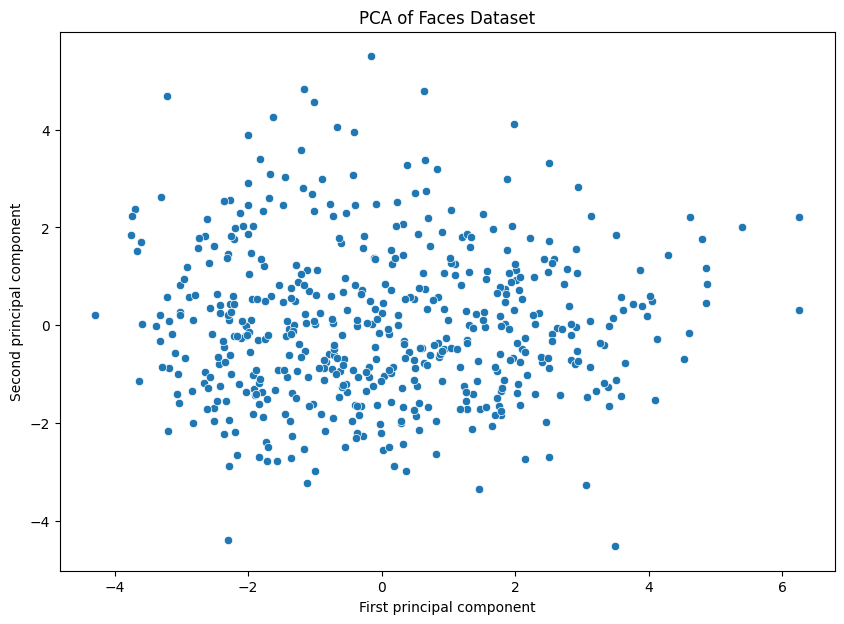

In [21]:
import pandas as pd  # https://pandas.pydata.org/
import numpy as np  # https://numpy.org/
from sklearn.preprocessing import StandardScaler  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.decomposition import PCA  # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
import matplotlib.pyplot as plt  # https://matplotlib.org/
import seaborn as sns  # statistical data visualization; https://seaborn.pydata.org/

data = pd.read_csv('faces/faces_AU.csv') # read data

features = [col for col in data.columns if '_r' in col]  # selects columns with '_r' in the name
# AU derived from https://www.cs.cmu.edu/~face/facs.htm
X = data[features]

scaler = StandardScaler() # use skLearn StandardScaler to scale the data
X_scaled = scaler.fit_transform(X) # fit the scaler to the data and transform the data

# PCA
pca = PCA(n_components=2)  # use PCA from skLearn to reduce the dimensionality to 2
X_pca = pca.fit_transform(X_scaled) # fit the PCA to the scaled data and transform the data

# Explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_) # print the explained variance by component

# visualization
plt.figure(figsize=(10, 7)) # set the size of the plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1]) # create a scatterplot of the first and second principal component
plt.title('PCA of Faces Dataset') # set the title of the plot
plt.xlabel('First principal component') # set the x-axis label
plt.ylabel('Second principal component') # set the y-axis label
plt.show() # show the plot


# **Part 2. K-Means and Silhouette Score. Using the PCA-reduced data (i.e, now each point is represented by 2 numbers), perform K-Means clustering and calculate a silhouette score for various values of K. Plot the scores for easier visualization. What is the optimal silhouette score that you find, and with which value of K? What does this signify? If you use scikit-learn KMeans, please set random_state = 0 to facilitate marking.**


Silhouette Score for k = 2: 0.39144908501466175
Silhouette Score for k = 3: 0.3784819324230084
Silhouette Score for k = 4: 0.34122750564534116
Silhouette Score for k = 5: 0.34058891498287336
Silhouette Score for k = 6: 0.33317629432406964
Silhouette Score for k = 7: 0.34370980055044875
Silhouette Score for k = 8: 0.33235865831125594
Silhouette Score for k = 9: 0.3419876088637408
Silhouette Score for k = 10: 0.33797245266802256


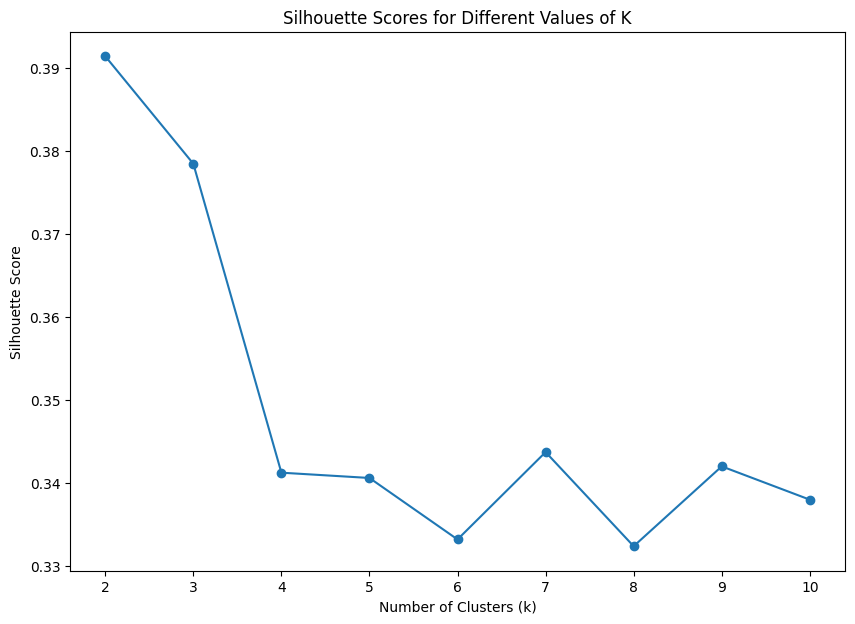

In [22]:
from sklearn.cluster import KMeans # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.metrics import silhouette_score # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

k_values = range(2, 11)  # simple value range for k

silhouette_scores = [] # array to store silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # k cluster values from 2 to 10, random_state=0 for reproducibility, n_init=10 for 10 initializations and suppress warnings
    cluster_labels = kmeans.fit_predict(X_pca)  # fit the kmeans model to the data and predict the clusters
    
    # calculate silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels) # calculate the silhouette score
    silhouette_scores.append(silhouette_avg) # append the silhouette score to the array
    print(f"Silhouette Score for k = {k}: {silhouette_avg}") # print the silhouette score

# use plots from matplotlib to visualize the silhouette scores, higher is better
plt.figure(figsize=(10, 7)) # set the size of the plot
plt.plot(k_values, silhouette_scores, marker='o') # create a line plot of the silhouette scores
plt.title('Silhouette Scores for Different Values of K') # set the title of the plot
plt.xlabel('Number of Clusters (k)') # set the x-axis label
plt.ylabel('Silhouette Score') # set the y-axis label
plt.show() # show the plot


# **Part 3. Cluster Interpretation. Use your chosen K from Part 2 and visualize the clusters as calculated using K-Means. In other words, each point should now be coloured based on the cluster it belongs to. Using the faces image folder provided, inspect the clusters and the corresponding images. What labels can you propose for the clusters?**


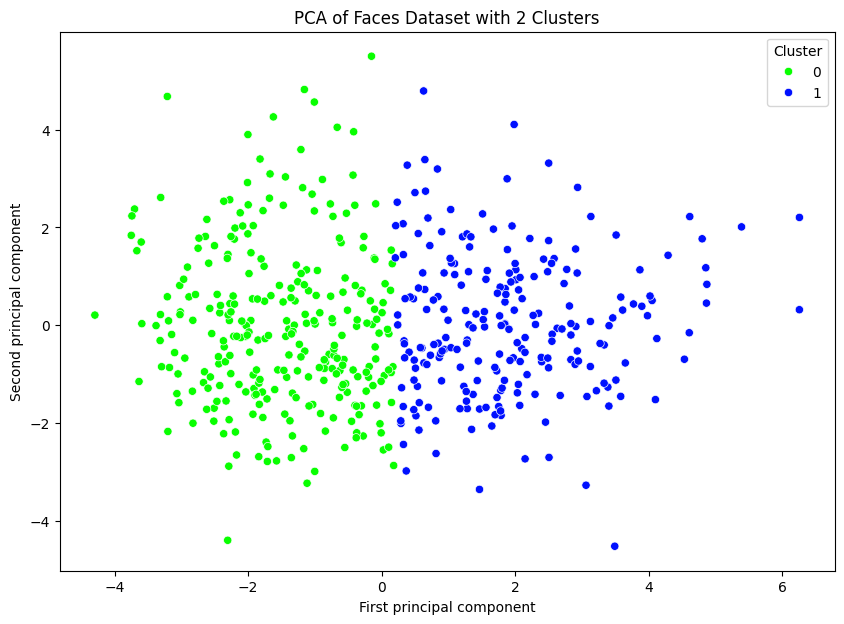

In [23]:
# max silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because k_values start at 2

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0, n_init=10) # use the optimal k value
cluster_labels_optimal = kmeans_optimal.fit_predict(X_pca) # fit the kmeans model to the data and predict the clusters

# visualize the clusters
plt.figure(figsize=(10, 7)) # set the size of the plot
palette = sns.color_palette('hsv', optimal_k) # set the color palette
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_optimal, palette=palette) # create a scatterplot of the first and second principal component with the optimal k value
plt.title(f'PCA of Faces Dataset with {optimal_k} Clusters') # set the title of the plot
plt.xlabel('First principal component') # set the x-axis label
plt.ylabel('Second principal component') # set the y-axis label
plt.legend(title='Cluster') # set the legend title
plt.show() # show the plot


# **Part 4. Use UMAP. Now, use UMAP to perform dimensionality reduction and repeat K-Means for clustering. How many clusters are found, and how does it compare to what you found in Part 3? Plot the clustering results in a visualization.**


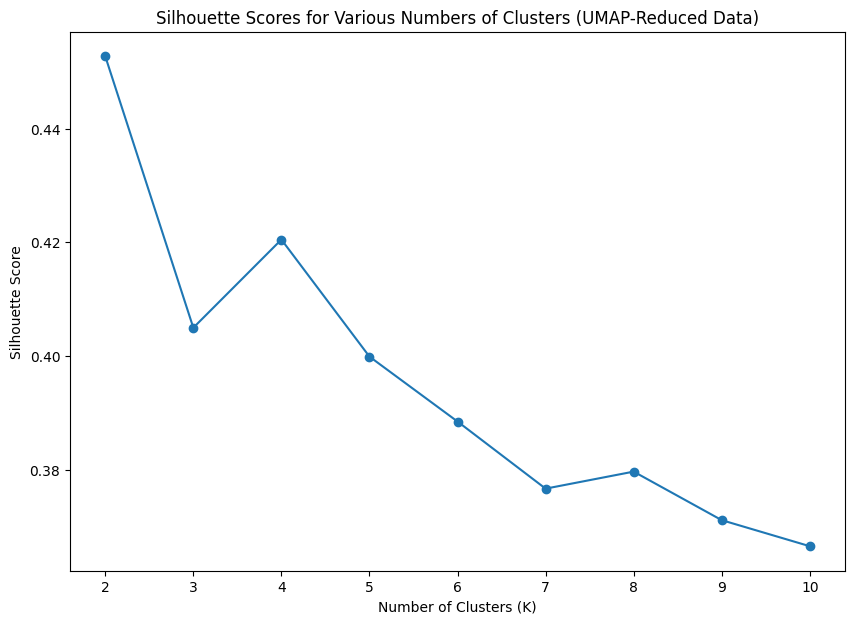

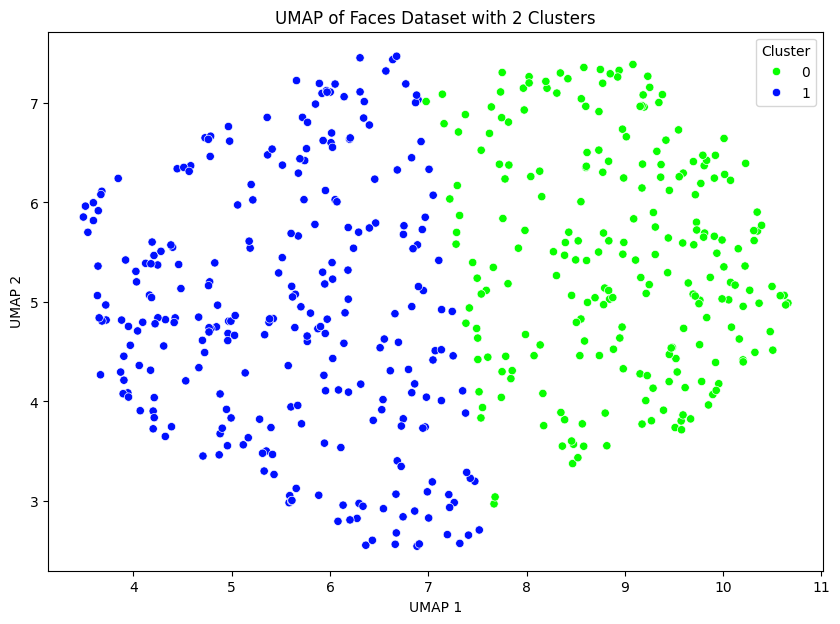

In [24]:
import umap.umap_ as umap # https://umap-learn.readthedocs.io/en/latest/

# UMAP dimensionality reduction
reducer = umap.UMAP(random_state=0, n_jobs=1) # use UMAP from umap-learn to reduce the dimensionality to 2, set random_state=0 for reproducibility, n_jobs=1 to suppress warnings and produce determinstic results
X_umap = reducer.fit_transform(X_scaled) # fit the UMAP to the scaled data and transform the data
 
silhouette_scores = [] # array to store silhouette scores
k_values = range(2, 11)  # simple value range for k
for K in k_values: # for each k value
    kmeans = KMeans(n_clusters=K, random_state=0, n_init=10) # k cluster values from 2 to 10, random_state=0 for reproducibility, n_init=10 for 10 initializations and suppress warnings
    cluster_labels = kmeans.fit_predict(X_umap) # fit the kmeans model to the data and predict the clusters
    silhouette_avg = silhouette_score(X_umap, cluster_labels) # calculate the silhouette score
    silhouette_scores.append(silhouette_avg) # append the silhouette score to the array

plt.figure(figsize=(10, 7)) # set the size of the plot
plt.plot(k_values, silhouette_scores, marker='o') # create a line plot of the silhouette scores
plt.title('Silhouette Scores for Various Numbers of Clusters (UMAP-Reduced Data)') # set the title of the plot
plt.xlabel('Number of Clusters (K)') # set the x-axis label
plt.ylabel('Silhouette Score') # set the y-axis label
plt.show() # show the plot

optimal_k_umap = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because range starts at 2

# visualize the clusters
kmeans_optimal_umap = KMeans(n_clusters=optimal_k_umap, random_state=0, n_init=10) # use the optimal k value
cluster_labels_optimal_umap = kmeans_optimal_umap.fit_predict(X_umap) # fit the kmeans model to the data and predict the clusters

plt.figure(figsize=(10, 7)) # set the size of the plot
palette = sns.color_palette('hsv', optimal_k_umap)  # color per number of clusters
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=cluster_labels_optimal_umap, palette=palette) # create a scatterplot of the first and second UMAP component with the optimal k value
plt.title(f'UMAP of Faces Dataset with {optimal_k_umap} Clusters') # set the title of the plot
plt.xlabel('UMAP 1') # set the x-axis label
plt.ylabel('UMAP 2') # set the y-axis label
plt.legend(title='Cluster') # set the legend title
plt.show() # show the plot
